In [1]:
from sklearn import datasets, metrics
from sklearn.svm import SVC, LinearSVC
from sklearn.model_selection import train_test_split

import pandas as pd
import numpy as np
from sklearn.datasets import fetch_openml

import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
mnist = fetch_openml('mnist_784', data_home='./', as_frame=True)

In [48]:
do_pca: bool = True
pca_num_components: int = 9

In [49]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [50]:
mnist.data

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


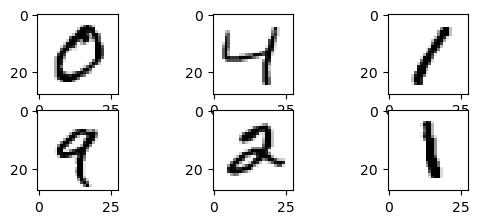

In [51]:
images = mnist.data.to_numpy()

for i in range(1, 7):
    subplot_idx = 430 + i
    plt.subplot(subplot_idx)
    plt.imshow((images[i].reshape(28,28)), cmap=plt.cm.gray_r, interpolation='nearest')

### Permute the indices randomly with `np.random.permutation`.

In [52]:
index_permutation = np.random.permutation(len(mnist.data))
index_permutation

array([47539, 18822, 22023, ..., 53923, 19714, 63086])

In [53]:
X = mnist.data.loc[index_permutation]
y = mnist.target.loc[index_permutation]
X

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
47539,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18822,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22023,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26238,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
47937,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3800,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3227,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
53923,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19714,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Reset index

Resets the indices of the rows to be ascending again.

In [54]:
X.reset_index(drop=True, inplace=True)
y.reset_index(drop=True, inplace=True)
X

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [71]:
split_index = 10000
end_index = round(split_index * 1.3)
X_train, X_test = X[:split_index], X[split_index:end_index]
y_train, y_test = y[:split_index], y[split_index:end_index]


In [79]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=19)

In [80]:
from typing import Tuple
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


def include_pca_preprocessing(data: pd.DataFrame, num_components: int) -> pd.DataFrame:
    standard_data = StandardScaler().fit_transform(data)
    pca = PCA(num_components)
    X_pca = pca.fit_transform(standard_data)
    return X_pca


In [81]:
if do_pca == True:
    X_train = include_pca_preprocessing(X_train, pca_num_components)
    X_test = include_pca_preprocessing(X_test, pca_num_components)


In [88]:
svc = SVC(gamma='scale', class_weight='balanced', C=100)
# svc = SVC()
svc.fit(X_train, y_train)

SVC(C=100, class_weight='balanced')

In [89]:
y_prediction = svc.predict(X_test)

In [90]:
print(
    f'Classification report for classifier {svc}:\n'
    f'{metrics.classification_report(y_test, y_prediction)}'
)

Classification report for classifier SVC(C=100, class_weight='balanced'):
              precision    recall  f1-score   support

           0       0.80      0.86      0.83      2702
           1       0.89      0.90      0.90      3149
           2       0.65      0.72      0.69      2697
           3       0.59      0.52      0.55      2922
           4       0.68      0.69      0.69      2745
           5       0.53      0.56      0.54      2536
           6       0.78      0.54      0.64      2798
           7       0.79      0.82      0.80      2947
           8       0.68      0.63      0.66      2706
           9       0.54      0.66      0.59      2798

    accuracy                           0.69     28000
   macro avg       0.69      0.69      0.69     28000
weighted avg       0.70      0.69      0.69     28000



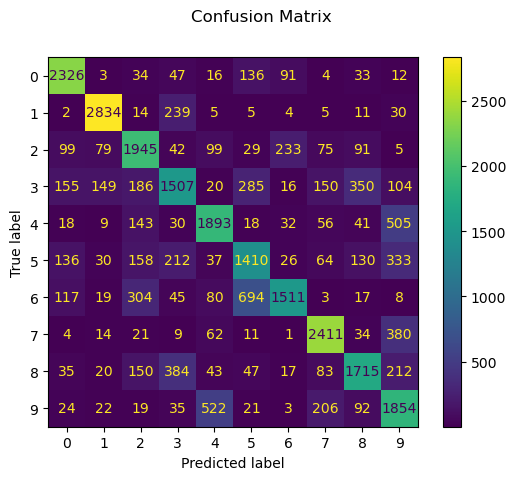

In [91]:
confusion_matrix = metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_prediction)
confusion_matrix.figure_.suptitle('Confusion Matrix')

plt.show()